<a href="https://colab.research.google.com/github/Lakshmaiah523/mini-project/blob/main/training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
6+994#install kaggle4444/
!pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.image import imread
import cv2
import random
import os
from os import listdir
from PIL import Image
import tensorflow as tf
from keras.preprocessing import image
from tensorflow.keras.utils import img_to_array, array_to_img, to_categorical
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import *
from tensorflow.keras.models import *
from keras.optimizers import Adam
from keras.models import Sequential+
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Flatten, Dropout, Dense
from sklearn.model_selection import train_test_split
from keras.models import model_from_json
from keras.utils import to_categorical

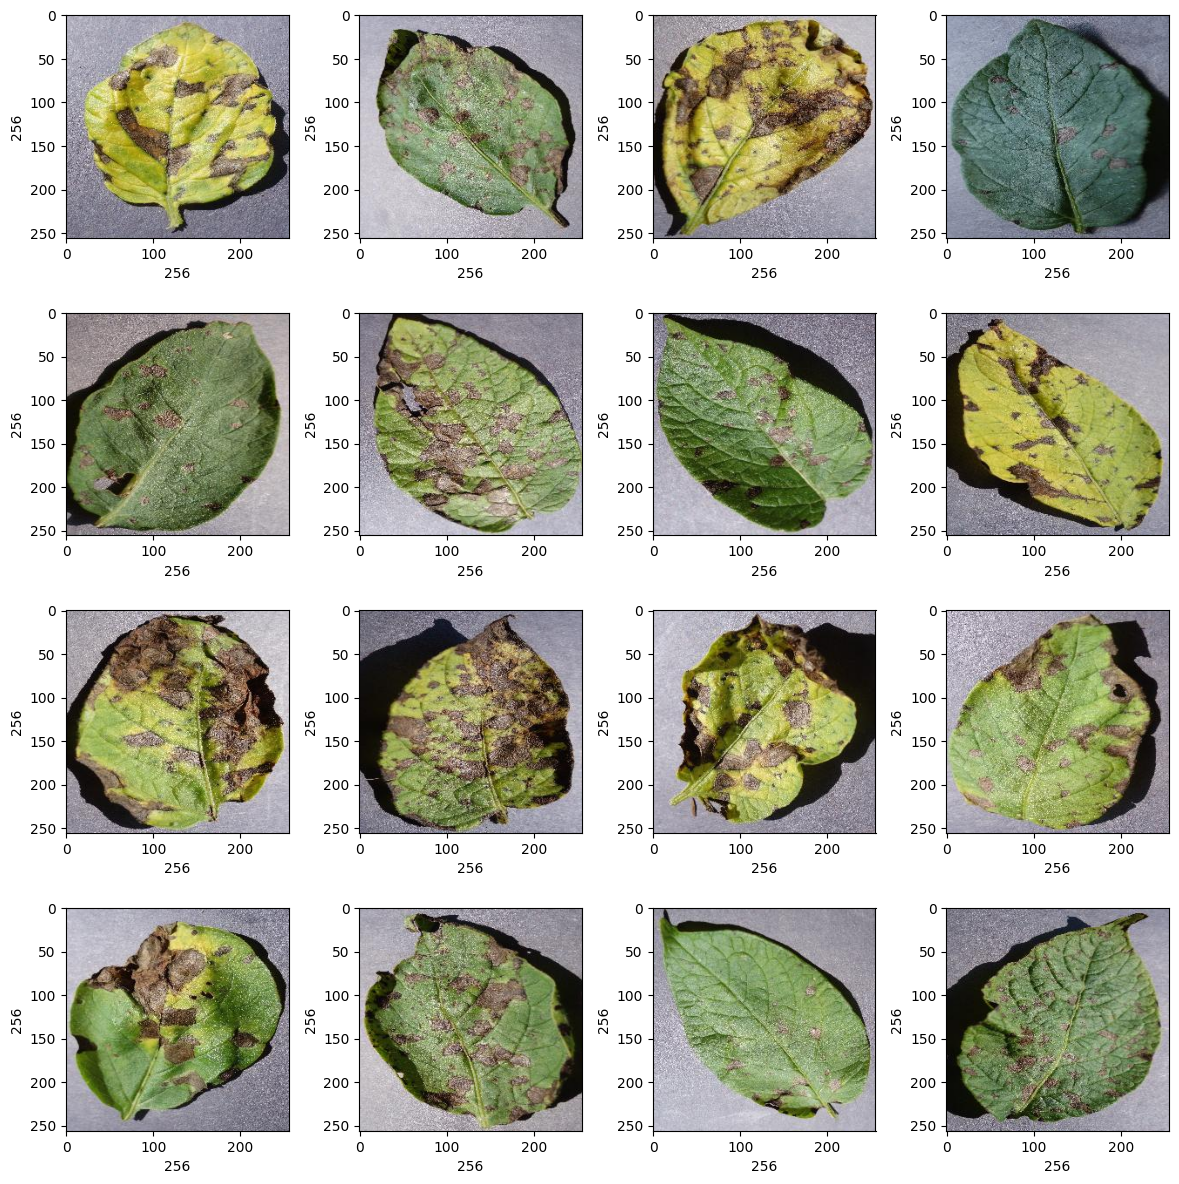

In [ ]:
#plotting some images
plt.figure(figsize=(12,12))
path = "/content/drive/MyDrive/Plant Disease Prediction Project/Dataset/Potato_Early_blight"
for i in range(1,17):
  plt.subplot(4,4,i)
  plt.tight_layout()
  rand_img = imread(path + '/' + random.choice(sorted(os.listdir(path))))
  plt.imshow(rand_img)
  plt.xlabel(rand_img.shape[1], fontsize = 10)#width
  plt.ylabel(rand_img.shape[0], fontsize = 10)#height

In [ ]:
#convert images to an array
def convert_image_to_array(image_dir):
  try:
    image = cv2.imread(image_dir)
    if image is not None:
      image = cv2.resize(image, (256,256))
      return img_to_array(image)
    else:
      return np.array([])
  except Exception as e:
    print(f"Error : {e}")
    return None

In [ ]:
#labelling the images
dir = "/content/drive/MyDrive/Plant Disease Prediction Project/Dataset"
image_list, label_list = [], []
all_labels = ['Tomato_Early_blight', 'Tomato_Late_blight', 'Tomato_healthy']
binary_labels = [0,1,2]
temp = -1

#reading images and converting them to array
for directory in all_labels:
  plant_image_list = listdir(f"{dir}/{directory}")
  temp += 1
  for files in plant_image_list:
    image_path = f"{dir}/{directory}/{files}"
    image_list.append(convert_image_to_array(image_path)) #adding converted images as numpy array to image_list
    label_list.append(binary_labels[temp]) #labelling the classes

In [ ]:
#visualizing the data in each class
label_counts = pd.DataFrame(label_list).value_counts()
label_counts.head()

0    800
1    800
2    800
dtype: int64

In [ ]:
#confirming the size of each element in the list
image_list[0].shape

(256, 256, 3)

In [ ]:
# splitting our data into train, validate and test datasets
#here from our dataset we are allocating 20% to test data.
x_train, x_test, y_train, y_test = train_test_split(image_list,label_list, test_size = 0.2, random_state = 10)

In [ ]:
#normalizing the dataset of our images
#this improves the accuracy and integrity of the data
x_train = np.array(x_train, dtype = np.float16) / 255.0
x_test = np.array(x_test, dtype = np.float16) / 255.0
x_train = x_train.reshape(-1, 256, 256, 3)
x_test = x_test.reshape(-1, 256, 256, 3)

In [ ]:
#performing one-hot encoding on the target variable
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [ ]:
#creating the neural network model using convolutional neural network and maxPooling to downsample and flattening to obtain the 1D output and dense layer
model = Sequential()
model.add(Conv2D(32, (3,3), padding="same", input_shape=(256,256,3), activation="relu"))
model.add(MaxPooling2D(pool_size=(3,3)))
model.add(Conv2D(64, (3,3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64, (3,3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64, (3,3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(64, activation="relu"))
model.add(Dense(3, activation="softmax"))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 256, 256, 32)      896       
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 85, 85, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 83, 83, 64)        18496     
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 41, 41, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 39, 39, 64)        36928     
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 19, 19, 64)       

In [ ]:
#compiling the model to categorical crossentropy loss and setting the metrics to accuracy
model.compile(loss = 'categorical_crossentropy', optimizer = Adam(0.0001), metrics=['accuracy'])

In [ ]:
#further splitting the training data into training and validation data sets
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.2, random_state = 10)

In [ ]:
#training the model with batch size of 128 and 50 epochs
epochs = 30
batch_size = 64
history = model.fit(x_train, y_train, batch_size = batch_size, epochs = epochs, validation_data = (x_val, y_val))

Epoch 1/30
20/20 [==============================] - 58s 3s/step - loss: 0.1650 - accuracy: 0.9349 - val_loss: 0.3248 - val_accuracy: 0.8701
Epoch 2/30
20/20 [==============================] - 59s 3s/step - loss: 0.1495 - accuracy: 0.9479 - val_loss: 0.3332 - val_accuracy: 0.8669
Epoch 3/30
20/20 [==============================] - 57s 3s/step - loss: 0.1454 - accuracy: 0.9503 - val_loss: 0.3413 - val_accuracy: 0.8636
Epoch 4/30
20/20 [==============================] - 57s 3s/step - loss: 0.1528 - accuracy: 0.9438 - val_loss: 0.3360 - val_accuracy: 0.8604
Epoch 5/30
20/20 [==============================] - 59s 3s/step - loss: 0.1455 - accuracy: 0.9463 - val_loss: 0.3449 - val_accuracy: 0.8539
Epoch 6/30
20/20 [==============================] - 57s 3s/step - loss: 0.1551 - accuracy: 0.9389 - val_loss: 0.3270 - val_accuracy: 0.8604
Epoch 7/30
20/20 [==============================] - 59s 3s/step - loss: 0.1437 - accuracy: 0.9487 - val_loss: 0.3286 - val_accuracy: 0.8669
Epoch 8/30
20/20 [==

In [ ]:
model.save("/content/drive/MyDrive/Plant Disease Prediction Project/model/plant_disease_model.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


<ipython-input-25-026c97de90b7>:9: UserWarning: Legend does not support handles for str instances.
A proxy artist may be used instead.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#controlling-the-legend-entries
  plt.legend("train", "val")


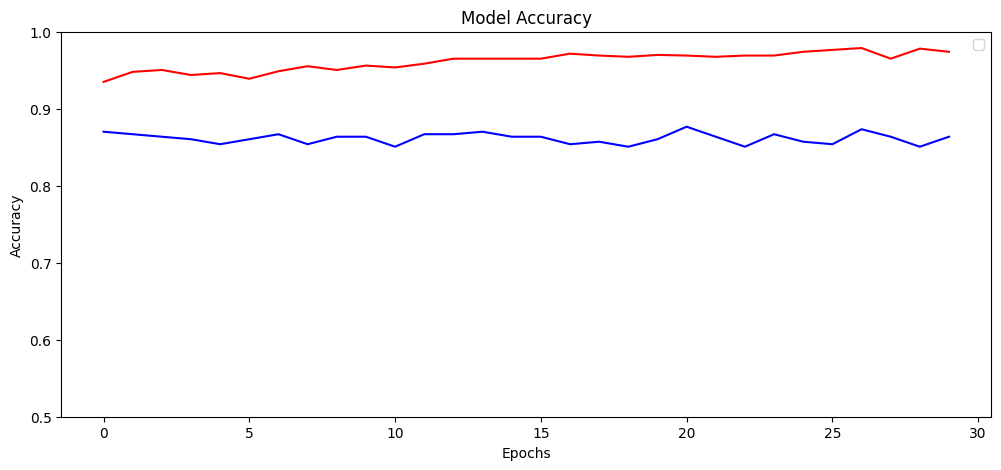

In [ ]:
#plotting the obtained accuracies
plt.figure(figsize=(12,5))
plt.plot(history.history['accuracy'], color='r')
plt.plot(history.history['val_accuracy'], color='b')
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epochs")
plt.ylim(0.5,1)
plt.legend("train", "val")

In [ ]:
print("Calculating model accuracy")
scores = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {scores[1]*100}")

Calculating model accuracy
15/15 [==============================] - 7s 444ms/step - loss: 0.2430 - accuracy: 0.9021
Test Accuracy: 90.20833373069763


In [ ]:
y_pred = model.predict(x_test)

15/15 [==============================] - 6s 394ms/step


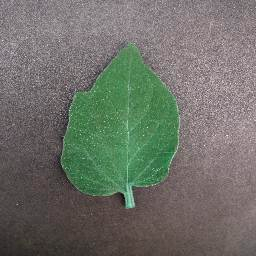

In [ ]:
#taking a random image from test data to predict
img = array_to_img(x_test[11])
img

In [ ]:
#printing actual and predicted label
print("Original Label: ", all_labels[np.argmax(y_test[11])])
print("Predicted Label: ", all_labels[np.argmax(y_pred[4])])
print(y_pred[2])

Original Label:  Tomato_healthy
Predicted Label:  Tomato_healthy
[2.8710469e-04 1.8120016e-05 9.9969471e-01]


In [ ]:
#selecting 50 random images and predicting their classes
for i in range(50):
  print(all_labels[np.argmax(y_test[i])], "->", all_labels[np.argmax(y_pred[i])])

Tomato_healthy -> Tomato_healthy
Tomato_healthy -> Tomato_healthy
Tomato_healthy -> Tomato_healthy
Tomato_Late_blight -> Tomato_Late_blight
Tomato_healthy -> Tomato_healthy
Tomato_Late_blight -> Tomato_Early_blight
Tomato_Late_blight -> Tomato_Late_blight
Tomato_Late_blight -> Tomato_Early_blight
Tomato_Late_blight -> Tomato_Late_blight
Tomato_Late_blight -> Tomato_Late_blight
Tomato_Late_blight -> Tomato_Late_blight
Tomato_healthy -> Tomato_healthy
Tomato_healthy -> Tomato_healthy
Tomato_Late_blight -> Tomato_Early_blight
Tomato_Early_blight -> Tomato_Early_blight
Tomato_Early_blight -> Tomato_Early_blight
Tomato_Early_blight -> Tomato_Early_blight
Tomato_Early_blight -> Tomato_Early_blight
Tomato_Late_blight -> Tomato_Late_blight
Tomato_Late_blight -> Tomato_Early_blight
Tomato_Early_blight -> Tomato_Early_blight
Tomato_Early_blight -> Tomato_Late_blight
Tomato_Late_blight -> Tomato_Late_blight
Tomato_Early_blight -> Tomato_Early_blight
Tomato_healthy -> Tomato_healthy
Tomato_Early_b